In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libs

In [ ]:
# Import all the tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plots inside the notebook
%matplotlib inline 

# Models from sklearn
from sklearn.linear_model import LogisticRegression # see the map
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# 0. Input Data

## Loading and preparing data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Sber_market/train.csv")

In [ ]:
df

,user_id,order_completed_at,cart
0,2,2015-03-22 09:25:46,399
1,2,2015-03-22 09:25:46,14
2,2,2015-03-22 09:25:46,198
3,2,2015-03-22 09:25:46,88
4,2,2015-03-22 09:25:46,157
...,...,...,...
3123059,12702,2020-09-03 23:45:45,441
3123060,12702,2020-09-03 23:45:45,92
3123061,12702,2020-09-03 23:45:45,431
3123062,12702,2020-09-03 23:45:45,24


In [ ]:
df.dtypes

user_id                int64
order_completed_at    object
cart                   int64
dtype: object

In [ ]:
df.shape

(3123064, 3)

In [ ]:
df.isna().sum()

user_id               0
order_completed_at    0
cart                  0
dtype: int64

In [ ]:
df.head()

,user_id,order_completed_at,cart
0,2,2015-03-22 09:25:46,399
1,2,2015-03-22 09:25:46,14
2,2,2015-03-22 09:25:46,198
3,2,2015-03-22 09:25:46,88
4,2,2015-03-22 09:25:46,157


## Convert datetime

In [ ]:
df['order_completed_at'] = pd.to_datetime(df['order_completed_at'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df.dtypes

user_id                        int64
order_completed_at    datetime64[ns]
cart                           int64
dtype: object

In [ ]:
# Make a copy
df_tmp = df.copy()

In [ ]:
df.head()

,user_id,order_completed_at,cart
0,2,2015-03-22 09:25:46,399
1,2,2015-03-22 09:25:46,14
2,2,2015-03-22 09:25:46,198
3,2,2015-03-22 09:25:46,88
4,2,2015-03-22 09:25:46,157


In [ ]:
df_tmp["year"] = df_tmp.order_completed_at.dt.year
df_tmp["month"] = df_tmp.order_completed_at.dt.month
df_tmp["day"] = df_tmp.order_completed_at.dt.day
df_tmp["hour"] = df_tmp.order_completed_at.dt.hour
df_tmp["min"] = df_tmp.order_completed_at.dt.minute
df_tmp["sec"] = df_tmp.order_completed_at.dt.second

In [ ]:
df_tmp.head()

,user_id,order_completed_at,cart,year,month,day,hour,min,sec
0,2,2015-03-22 09:25:46,399,2015,3,22,9,25,46
1,2,2015-03-22 09:25:46,14,2015,3,22,9,25,46
2,2,2015-03-22 09:25:46,198,2015,3,22,9,25,46
3,2,2015-03-22 09:25:46,88,2015,3,22,9,25,46
4,2,2015-03-22 09:25:46,157,2015,3,22,9,25,46


In [ ]:
# Now we can remove datetime column
df_tmp.drop("order_completed_at", axis = 1, inplace=True)

In [ ]:
df_tmp.head()

,user_id,cart,year,month,day,hour,min,sec
0,2,399,2015,3,22,9,25,46
1,2,14,2015,3,22,9,25,46
2,2,198,2015,3,22,9,25,46
3,2,88,2015,3,22,9,25,46
4,2,157,2015,3,22,9,25,46


In [ ]:
df_tmp.shape

(3123064, 8)

# 1. Data Analysis 

## Hist

In [ ]:
df.describe()

,user_id,cart
count,3.123064e+06,3.123064e+06
mean,7.253373e+03,2.273235e+02
std,5.337838e+03,2.112867e+02
min,0.000000e+00,0.000000e+00
25%,2.884000e+03,4.200000e+01
50%,6.055000e+03,1.460000e+02
75%,1.117200e+04,3.990000e+02
max,1.999900e+04,8.800000e+02


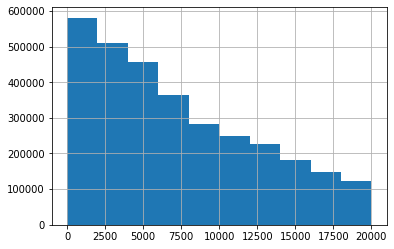

In [ ]:
df['user_id'].hist()

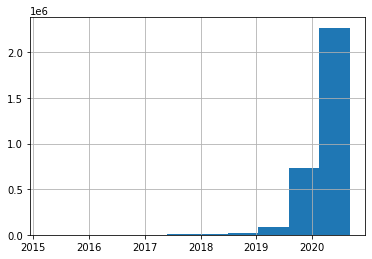

In [ ]:
df['order_completed_at'].hist()

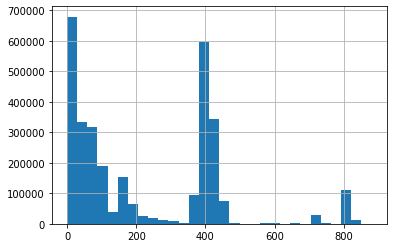

In [ ]:
df['cart'].hist(bins=30)

In [ ]:
df.corr()

,user_id,cart
user_id,1.000000,-0.005773
cart,-0.005773,1.000000


(2.5, -0.5)

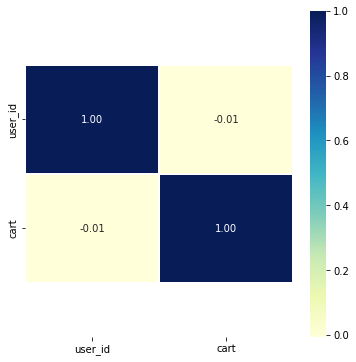

In [ ]:
# Adjust correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
df.head()

,user_id,order_completed_at,cart
0,2,2015-03-22 09:25:46,399
1,2,2015-03-22 09:25:46,14
2,2,2015-03-22 09:25:46,198
3,2,2015-03-22 09:25:46,88
4,2,2015-03-22 09:25:46,157


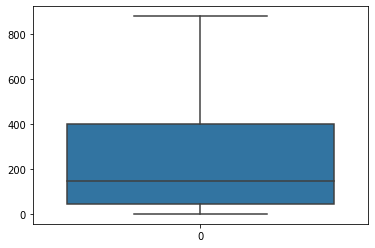

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df['cart']);

## Check user 1

In [ ]:
df_tmp.head()

,user_id,cart,year,month,day,hour,min,sec
0,2,399,2015,3,22,9,25,46
1,2,14,2015,3,22,9,25,46
2,2,198,2015,3,22,9,25,46
3,2,88,2015,3,22,9,25,46
4,2,157,2015,3,22,9,25,46


In [ ]:
new_df_user0 = df_tmp.loc[(df_tmp['user_id'] == 0)]
new_df_user0[:2]

,user_id,cart,year,month,day,hour,min,sec
2422913,0,20,2020,7,19,9,59,17
2422914,0,82,2020,7,19,9,59,17


In [ ]:
new_df_user0 = new_df_user0.groupby(['user_id', 'cart']).size().reset_index(name='count')

In [ ]:
new_df_user0[:2]

,user_id,cart,count
0,0,5,1
1,0,10,1


## All users agg

In [ ]:
df_tmp.head()

,user_id,cart,year,month,day,hour,min,sec
0,2,399,2015,3,22,9,25,46
1,2,14,2015,3,22,9,25,46
2,2,198,2015,3,22,9,25,46
3,2,88,2015,3,22,9,25,46
4,2,157,2015,3,22,9,25,46


In [ ]:
df.shape

(3123064, 3)

In [ ]:
df_tmp.shape

(3123064, 8)

In [ ]:
df_count = df_tmp.groupby(['user_id', 'cart']).size().reset_index(name='count')

In [ ]:
df_count

,user_id,cart,count
0,0,5,1
1,0,10,1
2,0,14,2
3,0,20,1
4,0,22,1
...,...,...,...
1117595,19998,409,1
1117596,19998,415,2
1117597,19998,420,2
1117598,19998,798,1


In [ ]:
df_count.shape

(1117600, 3)

In [ ]:
df_2 = df.loc[(df['user_id'] == 19999)]
df_2

,user_id,order_completed_at,cart
3074014,19999,2020-08-31 18:54:24,326
3074378,19999,2020-08-31 19:32:08,326
3074760,19999,2020-08-31 20:08:24,326


In [ ]:
new_df_2 = df_count.loc[(df_count['user_id'] == 19999)]
new_df_2

,user_id,cart,count
1117599,19999,326,3


In [ ]:
df_users = df_count.groupby(['user_id']).size().reset_index(name='num')
df_users.head()

,user_id,num
0,0,36
1,1,20
2,2,74
3,3,38
4,4,50


In [ ]:
def p_func(x,y):
  s = df_users['num'].loc[x]
  if y < s:
    return y/s
  else: return 1

In [ ]:
df_count['P'] = df_count.apply(lambda x: p_func(x['user_id'], x['count']), axis=1)

In [ ]:
df_count.loc[(df_count['user_id'] == 19999)].head()

,user_id,cart,count,P
1117599,19999,326,3,1.0


In [ ]:
df_users['num'].loc[19999]

1

### Boolean

In [ ]:
df_mean = df_count.groupby('user_id') \
       .agg({'P':'mean'}) \
       .rename(columns={'P':'mean_P'}) \
       .reset_index()

In [ ]:
df_mean[:5]

,user_id,mean_P
0,0,0.033951
1,1,0.092500
2,2,0.031410
3,3,0.042936
4,4,0.044800


In [ ]:
df_mean['mean_P'].loc[0]

0.03395061728395061

In [ ]:
def p_bool(x,y):
  s = df_mean['mean_P'].loc[x]
  if y > s :
    return 1
  else: 
    return 0  

In [ ]:
df_count['target'] = df_count.apply(lambda x: p_bool(x['user_id'], x['P']), axis=1)

In [ ]:
df_count

,user_id,cart,count,P,target
0,0,5,1,0.027778,0
1,0,10,1,0.027778,0
2,0,14,2,0.055556,1
3,0,20,1,0.027778,0
4,0,22,1,0.027778,0
...,...,...,...,...,...
1117595,19998,409,1,0.076923,0
1117596,19998,415,2,0.153846,1
1117597,19998,420,2,0.153846,1
1117598,19998,798,1,0.076923,0


# 2. Modeling (miss this step)

## Normalization for:

* Logistic Regression
* SVM
* PCA
* NN

In [ ]:
# Feature scaling with StandardScaler 
from sklearn.preprocessing import StandardScaler 

x = df_count.drop('target', axis=1)
y = df_count['target']

scale_features_std = StandardScaler() 
normal_x = scale_features_std.fit_transform(x)

In [ ]:
# Split the data

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(normal_x, y, test_size=0.2)

## `Logistic Regression`, `KNN`, `Random Forest`, `Naive Bayes`

In [ ]:
# Put model in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Naive Bayes": GaussianNB()}

# Create the function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given ml models
    """
    
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep scores
    model_scores = {}
    #Loop through model
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model append its scores to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'KNN': 0.9211077308518253,
 'Logistic Regression': 0.8915935934144595,
 'Naive Bayes': 0.8502952755905512,
 'Random Forest': 0.9626789549033643}

### Models Comparison

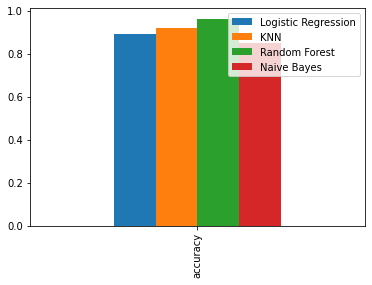

In [ ]:
models_compare = pd.DataFrame(model_scores, index=["accuracy"])
models_compare.plot.bar()

## CatBoost

In [ ]:
# !pip install catboost

     |████████████████████████████████| 76.3 MB 24 kB/s 


In [ ]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [ ]:
from catboost import CatBoostClassifier
model_catboost = CatBoostClassifier(#task_type="GPU",
                         loss_function= 'Logloss',
                         devices='0:1')
model_catboost.fit(x_train, y_train) #plot=True)

Learning rate set to 0.187574
0:	learn: 0.3538547	total: 230ms	remaining: 3m 49s
1:	learn: 0.2576324	total: 409ms	remaining: 3m 24s
2:	learn: 0.2234791	total: 583ms	remaining: 3m 13s
3:	learn: 0.2046898	total: 748ms	remaining: 3m 6s
4:	learn: 0.1952489	total: 931ms	remaining: 3m 5s
5:	learn: 0.1892086	total: 1.09s	remaining: 3m
6:	learn: 0.1852883	total: 1.25s	remaining: 2m 57s
7:	learn: 0.1820115	total: 1.41s	remaining: 2m 55s
8:	learn: 0.1796797	total: 1.58s	remaining: 2m 54s
9:	learn: 0.1779671	total: 1.75s	remaining: 2m 53s
10:	learn: 0.1768501	total: 1.92s	remaining: 2m 52s
11:	learn: 0.1761258	total: 2.09s	remaining: 2m 52s
12:	learn: 0.1754957	total: 2.25s	remaining: 2m 50s
13:	learn: 0.1750440	total: 2.4s	remaining: 2m 49s
14:	learn: 0.1746582	total: 2.55s	remaining: 2m 47s
15:	learn: 0.1743238	total: 2.71s	remaining: 2m 47s
16:	learn: 0.1740624	total: 2.88s	remaining: 2m 46s
17:	learn: 0.1738570	total: 3.04s	remaining: 2m 46s
18:	learn: 0.1737357	total: 3.2s	remaining: 2m 45s


In [ ]:
model_catboost.score(x_test, y_test)

0.9349543664996421

In [ ]:
# plot_feature_importance(model_catboost.feature_importances_, x_train.columns, 'CatBoost ')

## Hyperparameter tuning

### KNN

In [ ]:
# # Let's tune KNN

# train_scores = []
# test_scores = []

# # Create a list of different values for n_neighbours
# neighbors = range(1,5)

# # Setup KNN instance
# knn = KNeighborsClassifier()

# # Loop through different n_neughbors
# for i in neighbors: # default = 5
#     knn.set_params(n_neighbors=i)
    
#     # Fit the algorithm
#     knn.fit(x_train, y_train)
    
#     # Update the training scores list
#     train_scores.append(knn.score(x_train, y_train))
    
#     # Update the test scores list
#     test_scores.append(knn.score(x_test, y_test))

In [ ]:
train_scores

In [ ]:
test_scores

In [ ]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores,label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.xticks(np.arange(1, 20, 1))
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### LogisticRegression

In [ ]:
# Create a hyperparameter grid for logisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]} #return log scale

In [ ]:
# Tune LogisticRegression

np.random.seed(42)

# Setup
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit 
rs_log_reg.fit(x_train, y_train)

In [ ]:
rs_log_reg.best_params_

In [ ]:
rs_log_reg.score(x_test,y_test)

###RandomForestClassifier

In [ ]:
# Setup random seed
np.random.seed(42)

# Setup hyperparams..
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose =True,
                           n_jobs=-1)

# Fit 
rs_rf.fit(x_train, y_train)

In [ ]:
rs_rf.best_params_

In [ ]:
rs_rf.score(x_test, y_test)

In [ ]:
model_scores

# 3. Evaluating our tuned ml model (miss this step)

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score

In [ ]:
# Make predcitions with tuned model
y_preds = gs_log_reg.predict(x_test)
y_preds

NameError: ignored

In [ ]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

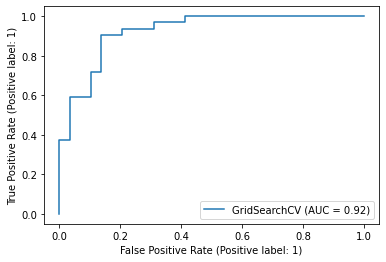

In [ ]:
# We need consfusion matrix before ROC curve
# Import ROC curve from sklearn.netrics module
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, x_test, y_test)

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


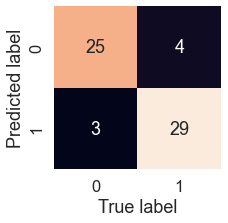

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_max(y_test, y_preds):
    """
    Plots a confusion matrux using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
   # bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_max(y_test, y_preds)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluating metrics using cross-validation

`cross_val_score()`

In [ ]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.23357214690901212,
                        solver="liblinear")

In [ ]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,x,y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [ ]:
# Cross-validated precision
cv_precision = cross_val_score(clf,x,y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [ ]:
# Cross-validated recall
cv_recall = cross_val_score(clf,x,y, cv=5, scoring="recall")
cv_recall  = np.mean(cv_recall )
cv_recall 

0.9272727272727274

In [ ]:
# Cross-validated f1
cv_f1 = cross_val_score(clf,x,y, cv=5, scoring="f1")
cv_f1  = np.mean(cv_f1 )
cv_f1 

0.8705403543192143

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

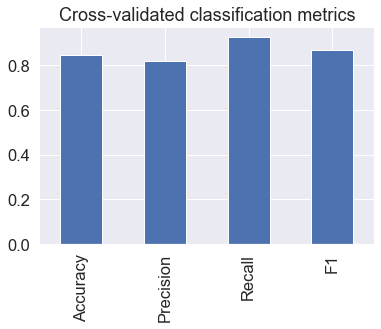

In [ ]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1}, index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False)

# 4. Output

In [ ]:
sample_sub = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Sber_market/sample_submission.csv")

In [ ]:
sample_sub

,id,target
0,0;133,0
1,0;5,1
2,0;10,0
3,0;396,1
4,0;14,0
...,...,...
790444,19998;26,0
790445,19998;31,0
790446,19998;29,1
790447,19998;798,1


In [ ]:
sample_sub.shape

(790449, 2)

In [ ]:
sample_sub.dtypes

id        object
target     int64
dtype: object

## Convert id's

In [ ]:
df_count.head()

,user_id,cart,count,P,target
0,0,5,1,0.027778,0
1,0,10,1,0.027778,0
2,0,14,2,0.055556,1
3,0,20,1,0.027778,0
4,0,22,1,0.027778,0


In [ ]:
final_df = df_count
final_df

,user_id,cart,count,P,target
0,0,5,1,0.027778,0
1,0,10,1,0.027778,0
2,0,14,2,0.055556,1
3,0,20,1,0.027778,0
4,0,22,1,0.027778,0
...,...,...,...,...,...
1117595,19998,409,1,0.076923,0
1117596,19998,415,2,0.153846,1
1117597,19998,420,2,0.153846,1
1117598,19998,798,1,0.076923,0


In [ ]:
final_df['id'] = final_df.user_id.astype(str) + ';' + final_df.cart.astype(str)
final_df.head()

,user_id,cart,count,P,target,id
0,0,5,1,0.027778,0,0;5
1,0,10,1,0.027778,0,0;10
2,0,14,2,0.055556,1,0;14
3,0,20,1,0.027778,0,0;20
4,0,22,1,0.027778,0,0;22


In [ ]:
final_df = final_df.drop('user_id', axis=1)
final_df = final_df.drop('cart', axis=1)
final_df = final_df.drop('count', axis=1)
final_df = final_df.drop('P', axis=1)
final_df.head()

,target,id
0,0,0;5
1,0,0;10
2,1,0;14
3,0,0;20
4,0,0;22


In [ ]:
columns_titles = ['id','target']
final_df=final_df.reindex(columns=columns_titles)

In [ ]:
final_df.head()

,id,target
0,0;5,0
1,0;10,0
2,0;14,1
3,0;20,0
4,0;22,0


In [ ]:
final_df.dtypes

id        object
target     int64
dtype: object

## left joint

In [ ]:
load_df = sample_sub.merge(final_df, on='id', how='left')
load_df

,id,target_x,target_y
0,0;133,0,0
1,0;5,1,0
2,0;10,0,0
3,0;396,1,0
4,0;14,0,1
...,...,...,...
790444,19998;26,0,0
790445,19998;31,0,0
790446,19998;29,1,0
790447,19998;798,1,0


In [ ]:
load_df = load_df.drop('target_x', axis = 1)
load_df

,id,target
0,0;133,0
1,0;5,0
2,0;10,0
3,0;396,0
4,0;14,1
...,...,...
790444,19998;26,0
790445,19998;31,0
790446,19998;29,0
790447,19998;798,0


In [ ]:
load_df.rename(columns={'target_y': 'target'}, inplace=True)
load_df

,id,target
0,0;133,0
1,0;5,0
2,0;10,0
3,0;396,0
4,0;14,1
...,...,...
790444,19998;26,0
790445,19998;31,0
790446,19998;29,0
790447,19998;798,0


In [ ]:
load_df.to_csv("/content/drive/MyDrive/Colab_Notebooks/outputs/sample_submission.csv", index=False)